# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
btc_url = btc_url + "?format=json"
eth_url = eth_url + "?format=json"

In [6]:
# Fetch current BTC price
response_my_data1 = requests.get(btc_url)
print(response_my_data1)

<Response [200]>


In [7]:
import json

# Use json.dumps to format data
btc_data = response_my_data1.json()
print(btc_data)

{'data': {'1': {'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'website_slug': 'bitcoin', 'rank': 1, 'circulating_supply': 19446050, 'total_supply': 19446050, 'max_supply': 21000000, 'quotes': {'USD': {'price': 29326.0, 'volume_24h': 18001881928, 'market_cap': 570625802650, 'percentage_change_1h': -0.227212570395178, 'percentage_change_24h': 1.68079873797463, 'percentage_change_7d': 0.0609556493388316, 'percent_change_1h': -0.227212570395178, 'percent_change_24h': 1.68079873797463, 'percent_change_7d': 0.0609556493388316}}, 'last_updated': 1690987033}}, 'metadata': {'timestamp': 1690987033, 'num_cryptocurrencies': 3119, 'error': None}}


In [8]:
# Compute current value of my crpto
my_btc_value = btc_data["data"]["1"]["quotes"]["USD"]["price"]
my_btc_value

29326.0

In [9]:
# Fetch current ETH price
response_my_data2 = requests.get(eth_url)
print(response_my_data2.content)

b'{\n\t"data": {\n\t\t"1027": {\n\t\t\t"id": 1027,\n\t\t\t"name": "Ethereum",\n\t\t\t"symbol": "ETH",\n\t\t\t"website_slug": "ethereum",\n\t\t\t"rank": 2,\n\t\t\t"circulating_supply": 121227152,\n\t\t\t"total_supply": 121227152,\n\t\t\t"max_supply": 121194499,\n\t\t\t"quotes": {\n\t\t\t\t"USD": {\n\t\t\t\t\t"price": 1845.2300000000000000,\n\t\t\t\t\t"volume_24h": 8866411282,\n\t\t\t\t\t"market_cap": 223587286345,\n\t\t\t\t\t"percentage_change_1h": -0.3559121183880680,\n\t\t\t\t\t"percentage_change_24h": 0.6949763859789870,\n\t\t\t\t\t"percentage_change_7d": -0.7329894676383360,\n\t\t\t\t\t"percent_change_1h": -0.3559121183880680,\n\t\t\t\t\t"percent_change_24h": 0.6949763859789870,\n\t\t\t\t\t"percent_change_7d": -0.7329894676383360\n\t\t\t\t}\n\t\t\t},\n\t\t\t"last_updated": 1690987029\n\t\t}\n\t},\n\t"metadata": {\n\t\t"timestamp": 1690987029,\n\t\t"num_cryptocurrencies": 3119,\n\t\t"error": null\n\t}\n}'


In [10]:
eth_data = response_my_data2.json()
print(eth_data)

{'data': {'1027': {'id': 1027, 'name': 'Ethereum', 'symbol': 'ETH', 'website_slug': 'ethereum', 'rank': 2, 'circulating_supply': 121227152, 'total_supply': 121227152, 'max_supply': 121194499, 'quotes': {'USD': {'price': 1845.23, 'volume_24h': 8866411282, 'market_cap': 223587286345, 'percentage_change_1h': -0.355912118388068, 'percentage_change_24h': 0.694976385978987, 'percentage_change_7d': -0.732989467638336, 'percent_change_1h': -0.355912118388068, 'percent_change_24h': 0.694976385978987, 'percent_change_7d': -0.732989467638336}}, 'last_updated': 1690987029}}, 'metadata': {'timestamp': 1690987029, 'num_cryptocurrencies': 3119, 'error': None}}


In [11]:
my_eth_value = eth_data["data"]["1027"]["quotes"]["USD"]["price"]
my_eth_value

1845.23

In [12]:
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $29326.00
The current value of your 5.3 ETH is $1845.23


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [13]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [14]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_API_SECRET")

In [15]:
# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [16]:
# Format current date as ISO format
start_date = pd.Timestamp("2020-05-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2023-08-01", tz="America/New_York").isoformat()
# Set the tickers
tickers = ['AGG', 'SPY']

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
tickers_data = api.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

tickers_data.head()

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2020-05-01 04:00:00+00:00,116.97,117.0998,116.6775,116.87,6099551,24394,116.846121,AGG
2020-05-04 04:00:00+00:00,116.89,117.0900,116.8700,116.97,3684081,15545,116.960599,AGG
2020-05-05 04:00:00+00:00,116.96,116.9700,116.8100,116.88,4611519,15146,116.879640,AGG
2020-05-06 04:00:00+00:00,116.44,116.7100,116.3000,116.41,6394949,20233,116.426742,AGG
2020-05-07 04:00:00+00:00,116.61,116.7700,116.4200,116.77,3786651,15963,116.641826,AGG


In [17]:
# Reorganize the DataFrame
#tickers_data = tickers_data.columns(["symbol"],["close"],["open"],["high"],["volume"],["trade_count"],["
# Separate ticker data
AGG = tickers_data[tickers_data["symbol"]=="AGG"].drop("symbol", axis=1)
SPY = tickers_data[tickers_data["symbol"]=="SPY"].drop("symbol", axis=1)
# Concatenate the ticker DataFrames
tickers_data = pd.concat([AGG, SPY], axis=1, keys=["AGG","SPY"])
tickers_data.head()


AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2020-05-01 04:00:00+00:00  116.97  117.0998  116.6775  116.87  6099551   
2020-05-04 04:00:00+00:00  116.89  117.0900  116.8700  116.97  3684081   
2020-05-05 04:00:00+00:00  116.96  116.9700  116.8100  116.88  4611519   
2020-05-06 04:00:00+00:00  116.44  116.7100  116.3000  116.41  6394949   
2020-05-07 04:00:00+00:00  116.61  116.7700  116.4200  116.77  3786651   

                                                      SPY                      \
                          trade_count        vwap    open      high       low   
timestamp                                                                       
2020-05-01 04:00:00+00:00       24394  116.846121  285.31  290.6572  281.5200   
2020-05-04 04:00:00+00:00       15545  116.960599  280.73  283.9000  279.1300   
2020-05-05 04:00:00+00:00       15146  116.879640  286.64  289.2500  283.7134   
2020-05-06 04:00:00+00:00       20233  116.426742  288.05  288.4600  283.7800   
2020-05-07 04:00:00+00:00       15963  116.641826  287.75  289.7800  287.1300   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2020-05-01 04:00:00+00:00  282.83  125180028      639987  284.092832  
2020-05-04 04:00:00+00:00  283.59   80882213      460681  281.765334  
2020-05-05 04:00:00+00:00  286.15   79569939      459764  287.400201  
2020-05-06 04:00:00+00:00  284.34   73632628      436219  286.096273  
2020-05-07 04:00:00+00:00  287.70   75250412      422688  287.989956

In [18]:
tickers_data.index = tickers_data.index.date

In [19]:
tickers_data.dropna()

AGG                                                    \
              open      high       low   close    volume trade_count   
2020-05-01  116.97  117.0998  116.6775  116.87   6099551       24394   
2020-05-04  116.89  117.0900  116.8700  116.97   3684081       15545   
2020-05-05  116.96  116.9700  116.8100  116.88   4611519       15146   
2020-05-06  116.44  116.7100  116.3000  116.41   6394949       20233   
2020-05-07  116.61  116.7700  116.4200  116.77   3786651       15963   
...            ...       ...       ...     ...       ...         ...   
2023-07-26   97.93   98.0650   97.6800   98.02   5907380       26939   
2023-07-27   97.84   97.9300   97.1050   97.18   6937871       32050   
2023-07-28   97.39   97.5900   97.3102   97.56   7667973       27237   
2023-07-31   97.53   97.8000   97.5219   97.68  11079096       31047   
2023-08-01   97.01   97.0900   96.7100   96.77   8810798       35631   

                           SPY                                         \
                  vwap    open      high       low   close     volume   
2020-05-01  116.846121  285.31  290.6572  281.5200  282.83  125180028   
2020-05-04  116.960599  280.73  283.9000  279.1300  283.59   80882213   
2020-05-05  116.879640  286.64  289.2500  283.7134  286.15   79569939   
2020-05-06  116.426742  288.05  288.4600  283.7800  284.34   73632628   
2020-05-07  116.641826  287.75  289.7800  287.1300  287.70   75250412   
...                ...     ...       ...       ...     ...        ...   
2023-07-26   97.864847  454.47  456.9900  453.3800  455.51   71066805   
2023-07-27   97.400513  459.02  459.4400  451.5500  452.49   92194375   
2023-07-28   97.508638  455.88  457.7800  452.4918  456.92   79583623   
2023-07-31   97.668432  457.41  458.1600  456.0450  457.79   62040449   
2023-08-01   96.817977  456.27  457.2500  455.4900  456.48   54329075   

                                    
           trade_count        vwap  
2020-05-01      639987  284.092832  
2020-05-04      460681  281.765334  
2020-05-05      459764  287.400201  
2020-05-06      436219  286.096273  
2020-05-07      422688  287.989956  
...                ...         ...  
2023-07-26      528134  454.998694  
2023-07-27      627051  455.321716  
2023-07-28      525115  456.262095  
2023-07-31      438676  457.175853  
2023-08-01      415940  456.479564  

[818 rows x 14 columns]

In [20]:
# Pick AGG and SPY close prices
df_closing_prices = pd.DataFrame()
df_closing_prices["AGG"] = tickers_data["AGG"]["close"]
df_closing_prices["SPY"] = tickers_data["SPY"]["close"]

df_closing_prices.tail()


,AGG,SPY
2023-07-26,98.02,455.51
2023-07-27,97.18,452.49
2023-07-28,97.56,456.92
2023-07-31,97.68,457.79
2023-08-01,96.77,456.48


In [21]:
#df_closing_prices.index = df_closing_prices.index.date

In [22]:
# Print AGG and SPY close prices
agg_close_price = float(df_closing_prices["AGG"][-1])
spy_close_price = float(df_closing_prices["SPY"][-1])
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $96.77
Current SPY closing price: $456.48


In [23]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22824.00
The current value of your 200 AGG shares is $19354.00


### Savings Health Analysis

In [24]:
# Set monthly household income
monthly_income = 12000
crypto = my_btc_value * my_btc + my_eth_value * my_eth
shares = my_agg_value + my_spy_value
# Consolidate financial assets data
savings_portfolio = monthly_income+crypto+shares
print(savings_portfolio)

99148.919


In [25]:
# Create savings DataFrame

value_data = {
    "Amount": [crypto,shares]
}
df_savings = pd.DataFrame(value_data, index=["crypto", "shares"])
# Display savings DataFrame
display(df_savings)

,Amount
crypto,44970.919
shares,42178.000


In [26]:
#value_data = {
#    "crypto": [crypto_value],
#    "shares": [shares_value]
#}
#df_value = pd.DataFrame(value_data)
#df_value

In [27]:
#df_value.plot.pie(y="shares", title="Stocks Portfolio Composition")

array([<Axes: title={'center': 'center'}, ylabel='amount'>], dtype=object)

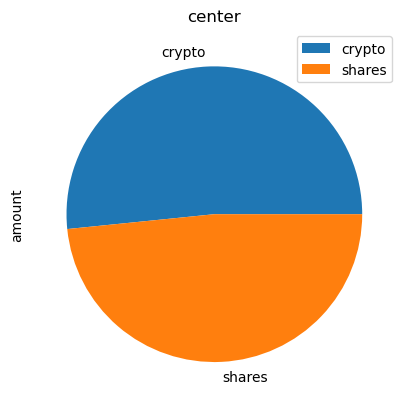

In [28]:
# Plot savings pie chart
df_savings.plot.pie(title={'center':'Composition of Personal Savings'}, ylabel='amount', subplots=True)

In [29]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
Total_savings = crypto + shares

# Validate saving health
if Total_savings >= emergency_fund:
    print("Congratulations! the person for having enough money in this fund.")
elif Total_savings <= emergency_fund:
    print("showing how many dollars away the person is from reaching the goal.")
elif Total_savings == emergency_fund:
    print("Congratulating the person on reaching this financial goal.")

Congratulations! the person for having enough money in this fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [30]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2018-08-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-08-01', tz='America/New_York').isoformat()
tickers = ['AGG', 'SPY']

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

In [31]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = api.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

df_stock_data.head()

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2018-08-01 04:00:00+00:00,105.55,105.7600,105.512,105.70,4534062,18024,105.682721,AGG
2018-08-02 04:00:00+00:00,105.76,105.7600,105.650,105.74,3671901,13787,105.721750,AGG
2018-08-03 04:00:00+00:00,105.81,105.9799,105.810,105.97,2542872,11998,105.924304,AGG
2018-08-06 04:00:00+00:00,106.03,106.1100,106.000,106.04,4120716,13656,106.067586,AGG
2018-08-07 04:00:00+00:00,105.97,105.9700,105.825,105.85,2532774,9522,105.876672,AGG


In [32]:
# Reorganize the DataFrame
# Separate ticker data

AGG = df_stock_data[df_stock_data["symbol"]=="AGG"].drop("symbol", axis=1)
SPY = df_stock_data[df_stock_data["symbol"]=="SPY"].drop("symbol", axis=1)

# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG, SPY], axis=1, keys=["AGG","SPY"])

# Display sample data
df_stock_data.head()

AGG                                      \
                             open      high      low   close   volume   
timestamp                                                               
2018-08-01 04:00:00+00:00  105.55  105.7600  105.512  105.70  4534062   
2018-08-02 04:00:00+00:00  105.76  105.7600  105.650  105.74  3671901   
2018-08-03 04:00:00+00:00  105.81  105.9799  105.810  105.97  2542872   
2018-08-06 04:00:00+00:00  106.03  106.1100  106.000  106.04  4120716   
2018-08-07 04:00:00+00:00  105.97  105.9700  105.825  105.85  2532774   

                                                      SPY                      \
                          trade_count        vwap    open      high       low   
timestamp                                                                       
2018-08-01 04:00:00+00:00       18024  105.682721  281.56  282.1300  280.1315   
2018-08-02 04:00:00+00:00       13787  105.721750  279.39  282.5800  279.1600   
2018-08-03 04:00:00+00:00       11998  105.924304  282.53  283.6577  282.3300   
2018-08-06 04:00:00+00:00       13656  106.067586  283.64  284.9900  283.2015   
2018-08-07 04:00:00+00:00        9522  105.876672  285.39  286.0100  285.2400   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2018-08-01 04:00:00+00:00  280.89  55015826      244835  281.076175  
2018-08-02 04:00:00+00:00  282.36  63766084      247750  281.496534  
2018-08-03 04:00:00+00:00  283.62  53965986      201724  283.200895  
2018-08-06 04:00:00+00:00  284.66  39450487      159467  284.366423  
2018-08-07 04:00:00+00:00  285.58  43427090      181015  285.635439

In [33]:
df_stock_data.index = df_stock_data.index.date
df_stock_data.head()

AGG                                                  \
              open      high      low   close   volume trade_count   
2018-08-01  105.55  105.7600  105.512  105.70  4534062       18024   
2018-08-02  105.76  105.7600  105.650  105.74  3671901       13787   
2018-08-03  105.81  105.9799  105.810  105.97  2542872       11998   
2018-08-06  106.03  106.1100  106.000  106.04  4120716       13656   
2018-08-07  105.97  105.9700  105.825  105.85  2532774        9522   

                           SPY                                        \
                  vwap    open      high       low   close    volume   
2018-08-01  105.682721  281.56  282.1300  280.1315  280.89  55015826   
2018-08-02  105.721750  279.39  282.5800  279.1600  282.36  63766084   
2018-08-03  105.924304  282.53  283.6577  282.3300  283.62  53965986   
2018-08-06  106.067586  283.64  284.9900  283.2015  284.66  39450487   
2018-08-07  105.876672  285.39  286.0100  285.2400  285.58  43427090   

                                    
           trade_count        vwap  
2018-08-01      244835  281.076175  
2018-08-02      247750  281.496534  
2018-08-03      201724  283.200895  
2018-08-06      159467  284.366423  
2018-08-07      181015  285.635439

In [34]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist30years = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [35]:
# Printing the simulation input data
MC_even_dist30years.portfolio_data

AGG                                                    \
              open      high       low   close    volume trade_count   
2018-08-01  105.55  105.7600  105.5120  105.70   4534062       18024   
2018-08-02  105.76  105.7600  105.6500  105.74   3671901       13787   
2018-08-03  105.81  105.9799  105.8100  105.97   2542872       11998   
2018-08-06  106.03  106.1100  106.0000  106.04   4120716       13656   
2018-08-07  105.97  105.9700  105.8250  105.85   2532774        9522   
...            ...       ...       ...     ...       ...         ...   
2023-07-26   97.93   98.0650   97.6800   98.02   5907380       26939   
2023-07-27   97.84   97.9300   97.1050   97.18   6937871       32050   
2023-07-28   97.39   97.5900   97.3102   97.56   7667973       27237   
2023-07-31   97.53   97.8000   97.5219   97.68  11079096       31047   
2023-08-01   97.01   97.0900   96.7100   96.77   8810798       35631   

                                        SPY                              \
                  vwap daily_return    open      high       low   close   
2018-08-01  105.682721          NaN  281.56  282.1300  280.1315  280.89   
2018-08-02  105.721750     0.000378  279.39  282.5800  279.1600  282.36   
2018-08-03  105.924304     0.002175  282.53  283.6577  282.3300  283.62   
2018-08-06  106.067586     0.000661  283.64  284.9900  283.2015  284.66   
2018-08-07  105.876672    -0.001792  285.39  286.0100  285.2400  285.58   
...                ...          ...     ...       ...       ...     ...   
2023-07-26   97.864847     0.003275  454.47  456.9900  453.3800  455.51   
2023-07-27   97.400513    -0.008570  459.02  459.4400  451.5500  452.49   
2023-07-28   97.508638     0.003910  455.88  457.7800  452.4918  456.92   
2023-07-31   97.668432     0.001230  457.41  458.1600  456.0450  457.79   
2023-08-01   96.817977    -0.009316  456.27  457.2500  455.4900  456.48   

                                                           
              volume trade_count        vwap daily_return  
2018-08-01  55015826      244835  281.076175          NaN  
2018-08-02  63766084      247750  281.496534     0.005233  
2018-08-03  53965986      201724  283.200895     0.004462  
2018-08-06  39450487      159467  284.366423     0.003667  
2018-08-07  43427090      181015  285.635439     0.003232  
...              ...         ...         ...          ...  
2023-07-26  71066805      528134  454.998694     0.000154  
2023-07-27  92194375      627051  455.321716    -0.006630  
2023-07-28  79583623      525115  456.262095     0.009790  
2023-07-31  62040449      438676  457.175853     0.001904  
2023-08-01  54329075      415940  456.479564    -0.002862  

[1258 rows x 16 columns]

In [36]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist30years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 110.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 120.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 130.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 140.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 150.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 160.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 170.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 180.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 190.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 200.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 210.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 220.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 230.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 240.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 250.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 260.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 270.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 280.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 290.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 300.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 310.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 320.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 330.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 340.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 350.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 360.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 370.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 380.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 390.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 400.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 410.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 420.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 430.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 440.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 450.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 460.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 470.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 480.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 490.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.008044,0.987289,0.993501,1.000221,1.003532,1.001263,1.009831,1.009238,0.989071,1.004357,...,1.003656,0.997221,1.002152,1.002302,0.999542,1.010202,1.000376,0.997396,1.004178,1.005302
2,1.020124,0.994854,0.993000,0.998032,0.997220,0.999402,1.008956,1.005915,0.999977,1.002826,...,1.004972,1.002392,0.994093,1.002620,0.994356,1.001695,0.991545,0.994219,1.011110,1.018136
3,1.017449,0.991794,0.997696,1.003722,0.995831,0.999154,1.012552,1.014627,0.996869,1.008818,...,1.005853,1.003556,0.989767,1.011285,0.998445,0.994793,0.994237,0.996902,1.018978,1.009003
4,1.017843,0.993770,0.986822,1.001118,0.997670,1.006305,1.013210,1.019886,0.991791,1.008110,...,1.007789,0.997846,0.982116,1.010081,0.995977,0.999599,0.998137,0.991098,1.017882,1.023921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,1.827769,5.495238,1.588745,2.647767,7.028110,1.046382,1.503159,3.864281,3.365289,12.668207,...,6.945265,2.247403,6.929520,3.753628,2.877829,3.552976,2.130254,2.643775,2.061068,4.421272
7557,1.820120,5.477784,1.598123,2.640086,6.988370,1.045332,1.510590,3.850865,3.395784,12.752294,...,7.021692,2.234010,6.979157,3.763183,2.901372,3.571325,2.127021,2.630420,2.077745,4.451906
7558,1.811425,5.489798,1.603863,2.649395,6.945260,1.048679,1.514078,3.868737,3.405840,12.787491,...,6.994832,2.231276,6.981880,3.761698,2.868840,3.591452,2.132201,2.624760,2.095591,4.416323
7559,1.791913,5.460722,1.613784,2.656439,6.866304,1.056595,1.510862,3.884696,3.395073,12.873589,...,7.017294,2.251462,7.025811,3.732802,2.909673,3.589607,2.133663,2.619576,2.080605,4.397051


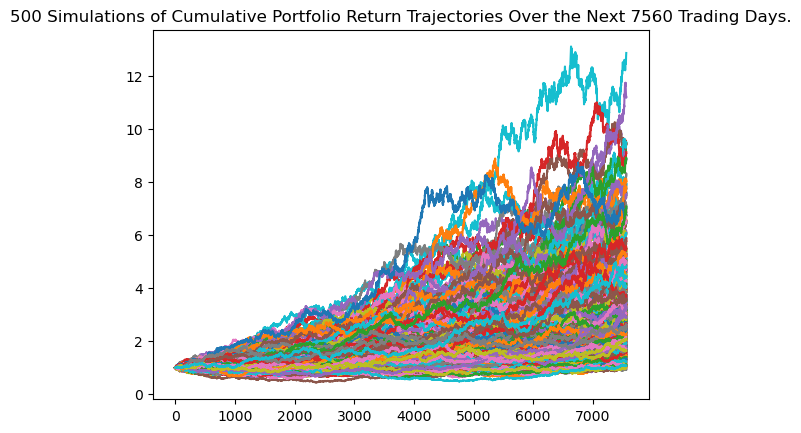

In [37]:
# Plot simulation outcomes
line_plot = MC_even_dist30years.plot_simulation()

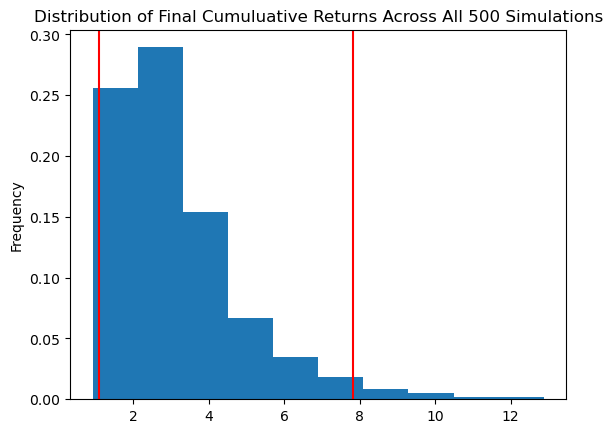

In [38]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist30years.plot_distribution()

### Retirement Analysis

In [39]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_even_dist30years.summarize_cumulative_return()


# Print summary statistics
print(even_tbl)

count           500.000000
mean              3.153907
std               1.734564
min               0.926643
25%               1.948630
50%               2.720351
75%               3.867008
max              12.878642
95% CI Lower      1.086243
95% CI Upper      7.818715
Name: 7560, dtype: float64


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [40]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(even_tbl[8]*20000,2)
ci_upper = round(even_tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio\n"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio
 over the next 30 years will end within in the range of $21724.85 and $156374.29


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [41]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(even_tbl[8]*20000*1.5,2)
ci_upper = round(even_tbl[9]*20000*1.5,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $32587.28 and $234561.44


In [42]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(even_tbl[8]*60000,2)
ci_upper = round(even_tbl[9]*60000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 30 years will end within in the range of $65174.55 and $469122.88


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [43]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_even_dist_5years = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*5
)

# Print the simulation input data
MC_even_dist_5years.portfolio_data.head()

AGG                                                  \
              open      high      low   close   volume trade_count   
2018-08-01  105.55  105.7600  105.512  105.70  4534062       18024   
2018-08-02  105.76  105.7600  105.650  105.74  3671901       13787   
2018-08-03  105.81  105.9799  105.810  105.97  2542872       11998   
2018-08-06  106.03  106.1100  106.000  106.04  4120716       13656   
2018-08-07  105.97  105.9700  105.825  105.85  2532774        9522   

                                        SPY                              \
                  vwap daily_return    open      high       low   close   
2018-08-01  105.682721          NaN  281.56  282.1300  280.1315  280.89   
2018-08-02  105.721750     0.000378  279.39  282.5800  279.1600  282.36   
2018-08-03  105.924304     0.002175  282.53  283.6577  282.3300  283.62   
2018-08-06  106.067586     0.000661  283.64  284.9900  283.2015  284.66   
2018-08-07  105.876672    -0.001792  285.39  286.0100  285.2400  285.58   

                                                           
              volume trade_count        vwap daily_return  
2018-08-01  55015826      244835  281.076175          NaN  
2018-08-02  63766084      247750  281.496534     0.005233  
2018-08-03  53965986      201724  283.200895     0.004462  
2018-08-06  39450487      159467  284.366423     0.003667  
2018-08-07  43427090      181015  285.635439     0.003232

In [44]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_even_dist_5years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 330.
Running Monte Carlo simulation number 340.
Running Monte Carlo simulation number 350.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 360.
Running Monte Carlo simulation number 370.
Running Monte Carlo simulation number 380.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 390.
Running Monte Carlo simulation number 400.
Running Monte Carlo simulation number 410.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 420.
Running Monte Carlo simulation number 430.
Running Monte Carlo simulation number 440.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 450.
Running Monte Carlo simulation number 460.
Running Monte Carlo simulation number 470.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 480.
Running Monte Carlo simulation number 490.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995803,0.997422,0.996684,0.999804,0.992937,1.008114,1.000535,1.010798,1.001566,1.001936,...,0.995665,0.994962,0.991048,1.004111,0.999367,0.992730,0.996880,0.995165,1.004348,0.997787
2,0.993946,1.005195,0.993558,0.992362,1.005095,1.011477,1.009940,1.005149,0.999614,1.007356,...,1.006042,1.006859,0.993687,1.001616,0.996149,0.997183,0.994143,1.007295,0.997996,0.996741
3,0.988179,1.022430,0.988024,0.986838,1.002153,1.012634,1.014272,1.004696,0.998030,1.003932,...,1.012346,1.004275,0.988293,1.001656,0.997085,0.995055,0.999247,1.014001,0.998581,1.006448
4,0.986943,1.031089,0.997848,0.996494,0.987045,1.011281,1.011309,1.006640,0.994895,1.006489,...,1.013469,1.007696,0.980133,1.004496,0.999227,1.003945,1.000146,1.005746,0.995197,1.004689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.493397,1.187106,1.172055,1.587185,0.720397,1.541194,2.104931,1.036753,1.421829,1.251079,...,1.485690,1.264045,1.020881,1.560673,0.968490,1.090691,1.331326,1.022383,1.294472,1.315733
1257,1.493613,1.177688,1.175555,1.592927,0.729472,1.538728,2.089048,1.033183,1.427711,1.256786,...,1.483578,1.253268,1.016943,1.560214,0.971578,1.083418,1.327692,1.016278,1.303052,1.309528
1258,1.500951,1.176976,1.168598,1.611130,0.726938,1.547216,2.088551,1.039385,1.409531,1.253287,...,1.479370,1.258125,1.027955,1.550249,0.977696,1.100417,1.324837,1.004732,1.306600,1.305055
1259,1.499446,1.170616,1.161355,1.604437,0.724805,1.532972,2.077935,1.050520,1.406518,1.255333,...,1.499405,1.245526,1.039413,1.541926,0.971406,1.111268,1.314719,1.002929,1.300708,1.307441


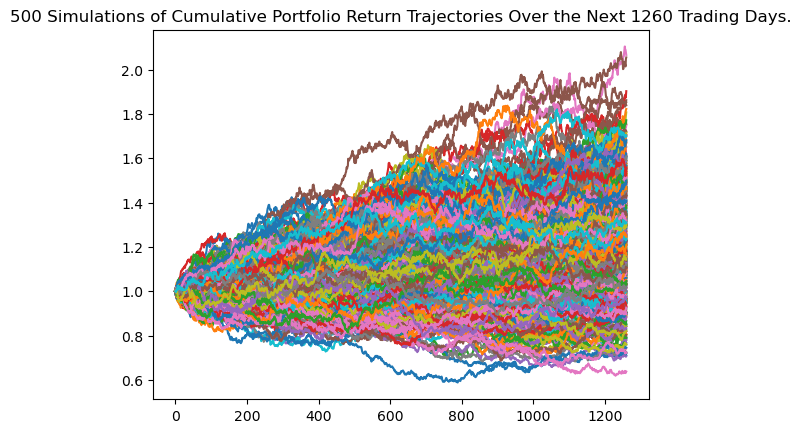

In [45]:
# Plot simulation outcomes
line_plot = MC_even_dist_5years.plot_simulation()

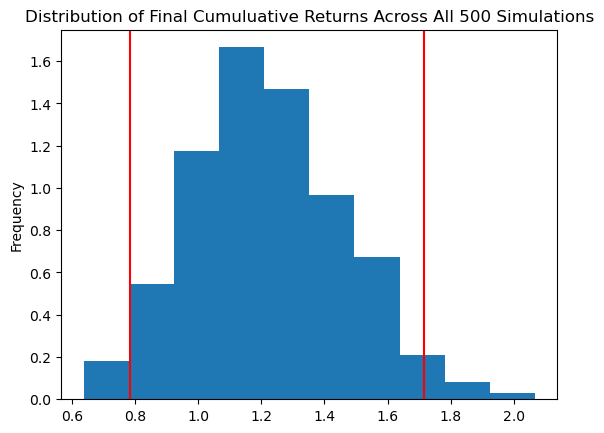

In [46]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist_5years.plot_distribution()

In [47]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl_5yrs = MC_even_dist_5years.summarize_cumulative_return()

# Print summary statistics
print(even_tbl_5yrs)

count           500.000000
mean              1.221242
std               0.246216
min               0.637580
25%               1.046343
50%               1.198098
75%               1.387508
max               2.066779
95% CI Lower      0.782517
95% CI Upper      1.716721
Name: 1260, dtype: float64


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [48]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(even_tbl_5yrs[8]*60000,2)
ci_upper_five = round(even_tbl_5yrs[9]*60000,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $46950.99 and $103003.28


### Ten Years Retirement Option

In [49]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_even_dist_10years = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*10
)

# Print the simulation input data
MC_even_dist_10years.portfolio_data.head()

AGG                                                  \
              open      high      low   close   volume trade_count   
2018-08-01  105.55  105.7600  105.512  105.70  4534062       18024   
2018-08-02  105.76  105.7600  105.650  105.74  3671901       13787   
2018-08-03  105.81  105.9799  105.810  105.97  2542872       11998   
2018-08-06  106.03  106.1100  106.000  106.04  4120716       13656   
2018-08-07  105.97  105.9700  105.825  105.85  2532774        9522   

                                        SPY                              \
                  vwap daily_return    open      high       low   close   
2018-08-01  105.682721          NaN  281.56  282.1300  280.1315  280.89   
2018-08-02  105.721750     0.000378  279.39  282.5800  279.1600  282.36   
2018-08-03  105.924304     0.002175  282.53  283.6577  282.3300  283.62   
2018-08-06  106.067586     0.000661  283.64  284.9900  283.2015  284.66   
2018-08-07  105.876672    -0.001792  285.39  286.0100  285.2400  285.58   

                                                           
              volume trade_count        vwap daily_return  
2018-08-01  55015826      244835  281.076175          NaN  
2018-08-02  63766084      247750  281.496534     0.005233  
2018-08-03  53965986      201724  283.200895     0.004462  
2018-08-06  39450487      159467  284.366423     0.003667  
2018-08-07  43427090      181015  285.635439     0.003232

In [50]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_even_dist_10years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 340.
Running Monte Carlo simulation number 350.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 360.
Running Monte Carlo simulation number 370.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 380.
Running Monte Carlo simulation number 390.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 400.
Running Monte Carlo simulation number 410.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 420.
Running Monte Carlo simulation number 430.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 440.
Running Monte Carlo simulation number 450.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 460.
Running Monte Carlo simulation number 470.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 480.
Running Monte Carlo simulation number 490.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.992579,1.003173,0.993563,1.004490,0.999746,1.001714,0.998283,1.002098,1.003575,1.007096,...,0.996758,0.998327,0.998501,1.005015,0.994472,1.008915,1.009364,0.993551,1.009711,1.006960
2,0.999524,0.986279,0.997582,1.009057,0.996229,1.000242,0.995972,1.004692,1.001136,1.009446,...,1.003164,0.999782,1.002343,1.014356,0.997214,1.001565,1.011777,0.994191,1.014689,1.005764
3,0.997581,0.983766,0.999806,0.993936,0.994232,1.002261,0.994849,1.002868,0.997549,1.018110,...,0.996751,0.993552,1.008293,1.008027,0.991431,0.988179,1.011969,0.988143,1.015866,0.995653
4,0.992513,0.981678,1.002924,0.989722,0.989138,1.009074,0.992640,1.002947,0.992312,1.006015,...,0.990352,0.995020,1.006136,1.010347,0.990689,0.974893,1.014628,0.996533,1.012127,0.999269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,0.868816,1.328490,1.242573,2.003579,1.471702,1.196114,1.875834,1.839884,1.393226,2.036463,...,2.029229,1.112196,1.009384,1.134089,1.697193,1.479792,1.800403,1.188850,1.453330,0.766482
2517,0.872900,1.318715,1.247262,2.012974,1.474702,1.201823,1.891536,1.837227,1.386244,2.028470,...,2.037615,1.118081,1.006505,1.122711,1.703339,1.481794,1.795199,1.194615,1.447482,0.762483
2518,0.870660,1.314156,1.261496,2.015256,1.490529,1.199803,1.891020,1.844218,1.386022,2.012933,...,2.030194,1.121503,1.010937,1.114889,1.699096,1.502056,1.799598,1.193908,1.443070,0.765654
2519,0.873032,1.320071,1.248215,2.009636,1.481943,1.201057,1.908636,1.841554,1.387869,2.022758,...,2.030474,1.121017,1.002482,1.113958,1.707814,1.487597,1.797399,1.195104,1.437581,0.766576


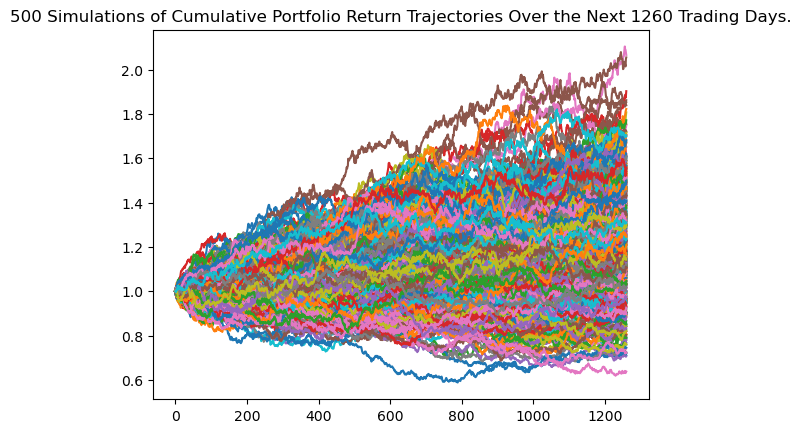

In [51]:
# Plot simulation outcomes
line_plot = MC_even_dist_5years.plot_simulation()

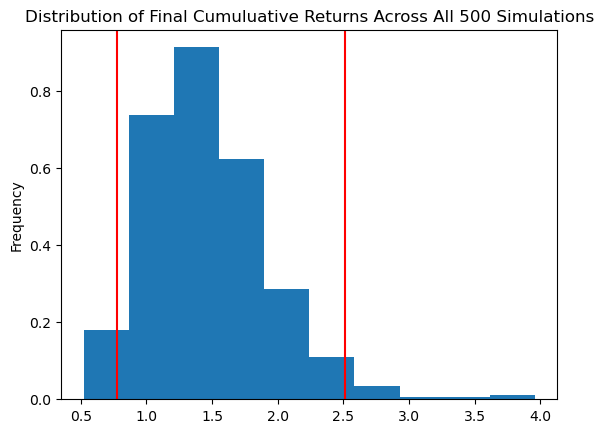

In [52]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist_10years.plot_distribution()

In [53]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl_10yrs = MC_even_dist_10years.summarize_cumulative_return()

# Print summary statistics
print(even_tbl_10yrs)

count           500.000000
mean              1.471997
std               0.465527
min               0.523573
25%               1.127272
50%               1.409584
75%               1.744161
max               3.958606
95% CI Lower      0.773819
95% CI Upper      2.514985
Name: 2520, dtype: float64


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [54]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(even_tbl_10yrs[8]*60000,2)
ci_upper_ten = round(even_tbl_10yrs[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $46429.14 and $150899.09


### 10years portfolio with 60% of stocks(SPY) scenario

In [55]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns with higher stock investment portion
MC_morespy_10years = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*10
)

# Print the simulation input data
MC_morespy_10years.portfolio_data.head()

AGG                                                  \
              open      high      low   close   volume trade_count   
2018-08-01  105.55  105.7600  105.512  105.70  4534062       18024   
2018-08-02  105.76  105.7600  105.650  105.74  3671901       13787   
2018-08-03  105.81  105.9799  105.810  105.97  2542872       11998   
2018-08-06  106.03  106.1100  106.000  106.04  4120716       13656   
2018-08-07  105.97  105.9700  105.825  105.85  2532774        9522   

                                        SPY                              \
                  vwap daily_return    open      high       low   close   
2018-08-01  105.682721          NaN  281.56  282.1300  280.1315  280.89   
2018-08-02  105.721750     0.000378  279.39  282.5800  279.1600  282.36   
2018-08-03  105.924304     0.002175  282.53  283.6577  282.3300  283.62   
2018-08-06  106.067586     0.000661  283.64  284.9900  283.2015  284.66   
2018-08-07  105.876672    -0.001792  285.39  286.0100  285.2400  285.58   

                                                           
              volume trade_count        vwap daily_return  
2018-08-01  55015826      244835  281.076175          NaN  
2018-08-02  63766084      247750  281.496534     0.005233  
2018-08-03  53965986      201724  283.200895     0.004462  
2018-08-06  39450487      159467  284.366423     0.003667  
2018-08-07  43427090      181015  285.635439     0.003232

In [56]:
MC_morespy_10years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 340.
Running Monte Carlo simulation number 350.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 360.
Running Monte Carlo simulation number 370.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 380.
Running Monte Carlo simulation number 390.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 400.
Running Monte Carlo simulation number 410.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 420.
Running Monte Carlo simulation number 430.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 440.
Running Monte Carlo simulation number 450.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 460.
Running Monte Carlo simulation number 470.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 480.
Running Monte Carlo simulation number 490.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004609,0.992559,1.010311,0.993533,1.002604,0.997820,1.013541,0.991318,1.008067,0.993966,...,1.001890,0.989613,0.995850,1.011855,0.987560,0.993164,1.016716,0.989597,0.995910,0.987539
2,0.998584,0.999541,1.012201,1.000441,0.999835,1.006110,1.009909,0.985401,1.011271,0.980340,...,1.004388,0.992609,0.992387,1.026625,0.992919,1.004152,1.018216,0.985603,0.989222,0.984396
3,1.013360,0.992248,1.008865,1.006554,0.988392,0.996539,1.017676,0.982150,1.023215,0.971339,...,1.005993,0.991362,1.006185,1.042495,0.985071,0.999508,1.009099,0.999780,0.988460,0.981440
4,1.025688,0.986815,1.000394,1.005564,0.979488,0.990401,1.029262,0.975315,1.019987,0.978320,...,1.007737,0.986985,1.005956,1.037668,0.976742,1.000780,1.002258,0.992168,0.978491,0.988016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.342582,2.310294,0.859344,1.914922,2.321952,1.784132,1.667714,1.009553,0.997916,3.000722,...,3.015127,2.127961,2.718128,2.866679,1.871373,2.026415,1.083149,1.845364,2.064301,1.183404
2517,2.359985,2.300218,0.857517,1.899695,2.301444,1.789742,1.664077,1.021072,0.998224,2.985651,...,3.028241,2.141772,2.706815,2.860930,1.871042,2.040373,1.074502,1.837736,2.077868,1.176530
2518,2.344471,2.296424,0.851649,1.909245,2.317901,1.786502,1.658949,1.033953,0.998918,3.065140,...,3.003267,2.146272,2.681886,2.859921,1.861217,2.048134,1.067818,1.856372,2.060700,1.171053
2519,2.338088,2.284359,0.848973,1.940216,2.371894,1.758323,1.644331,1.039014,0.989577,3.053136,...,3.000098,2.165332,2.711743,2.849878,1.862198,2.044560,1.065180,1.861240,2.055759,1.170019


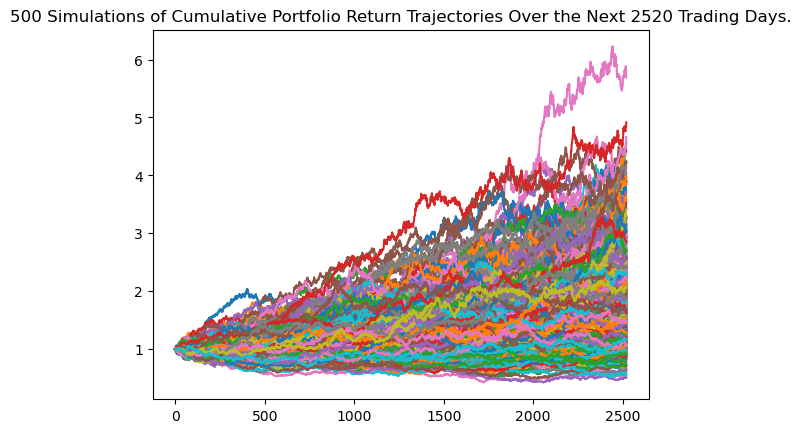

In [57]:
line_plot = MC_morespy_10years.plot_simulation()

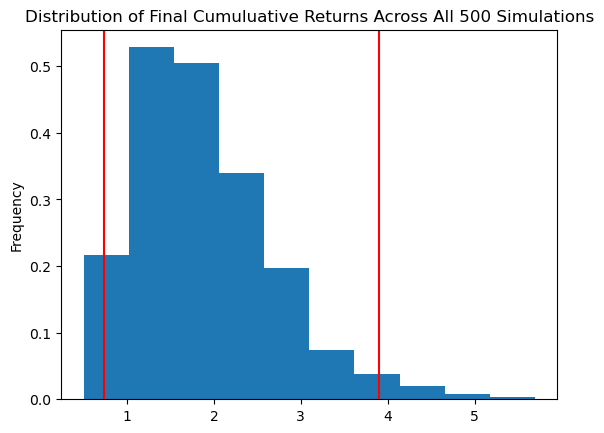

In [58]:
dist_plot = MC_morespy_10years.plot_distribution()

In [59]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl_10yrs60 = MC_morespy_10years.summarize_cumulative_return()

# Print summary statistics
print(even_tbl_10yrs60)

count           500.000000
mean              1.888268
std               0.804157
min               0.504519
25%               1.273743
50%               1.756382
75%               2.371205
max               5.691813
95% CI Lower      0.731467
95% CI Upper      3.893295
Name: 2520, dtype: float64


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [137]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten60 = round(even_tbl_10yrs60[8]*60000,2)
ci_upper_ten60 = round(even_tbl_10yrs60[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten60} and ${ci_upper_ten60}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $48574.26 and $243366.38


In [60]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns with higher stock investment portion
MC_morespy_5years = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*10
)

# Print the simulation input data
MC_morespy_5years.portfolio_data.head()

AGG                                                  \
              open      high      low   close   volume trade_count   
2018-08-01  105.55  105.7600  105.512  105.70  4534062       18024   
2018-08-02  105.76  105.7600  105.650  105.74  3671901       13787   
2018-08-03  105.81  105.9799  105.810  105.97  2542872       11998   
2018-08-06  106.03  106.1100  106.000  106.04  4120716       13656   
2018-08-07  105.97  105.9700  105.825  105.85  2532774        9522   

                                        SPY                              \
                  vwap daily_return    open      high       low   close   
2018-08-01  105.682721          NaN  281.56  282.1300  280.1315  280.89   
2018-08-02  105.721750     0.000378  279.39  282.5800  279.1600  282.36   
2018-08-03  105.924304     0.002175  282.53  283.6577  282.3300  283.62   
2018-08-06  106.067586     0.000661  283.64  284.9900  283.2015  284.66   
2018-08-07  105.876672    -0.001792  285.39  286.0100  285.2400  285.58   

                                                           
              volume trade_count        vwap daily_return  
2018-08-01  55015826      244835  281.076175          NaN  
2018-08-02  63766084      247750  281.496534     0.005233  
2018-08-03  53965986      201724  283.200895     0.004462  
2018-08-06  39450487      159467  284.366423     0.003667  
2018-08-07  43427090      181015  285.635439     0.003232

In [61]:
MC_morespy_5years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 340.
Running Monte Carlo simulation number 350.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 360.
Running Monte Carlo simulation number 370.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 380.
Running Monte Carlo simulation number 390.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 400.
Running Monte Carlo simulation number 410.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 420.
Running Monte Carlo simulation number 430.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 440.
Running Monte Carlo simulation number 450.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 460.
Running Monte Carlo simulation number 470.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Running Monte Carlo simulation number 480.
Running Monte Carlo simulation number 490.


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.991764,1.004917,1.002920,1.012603,0.991989,1.003162,0.999630,0.985363,0.991299,0.996461,...,1.000142,0.982189,0.994330,1.012678,1.009843,1.001908,1.019834,1.006583,1.000773,0.995157
2,0.980917,1.021734,1.010473,1.009886,1.009117,1.011508,1.003230,0.995358,0.999718,0.998475,...,1.008960,0.969481,0.994964,1.023384,1.007654,1.001395,1.032012,1.012235,0.998112,0.983411
3,0.990079,1.031572,1.010459,1.015689,1.023029,1.000021,1.011307,0.991187,0.997421,1.013359,...,0.998136,0.987968,0.989238,1.012674,1.020235,1.002771,1.031099,1.012898,1.009720,0.979950
4,1.000976,1.025436,1.012759,1.013761,1.018997,0.997047,1.006756,0.992590,0.981043,1.017567,...,1.000313,0.977624,0.993324,1.020908,1.022506,1.002638,1.048017,1.014052,1.002850,0.982758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.447997,1.336800,0.687791,3.838286,1.811685,3.287810,1.967621,1.418727,4.061370,1.291871,...,1.479184,0.752957,1.772985,2.187696,3.327407,2.432230,1.798774,1.162507,3.623895,1.881820
2517,2.463290,1.347971,0.681419,3.852134,1.791452,3.320637,1.953687,1.424981,4.060806,1.297356,...,1.480439,0.751964,1.805466,2.206383,3.306717,2.412716,1.801130,1.151682,3.580196,1.881243
2518,2.431624,1.335223,0.680465,3.865877,1.786789,3.320368,1.947216,1.413387,4.095208,1.291986,...,1.479418,0.751708,1.842143,2.188800,3.359725,2.405806,1.777606,1.174525,3.533473,1.875888
2519,2.442922,1.357024,0.682801,3.862182,1.771303,3.320673,1.954290,1.399806,4.113573,1.309166,...,1.491987,0.746502,1.833018,2.191796,3.343468,2.386151,1.791414,1.178000,3.498765,1.842906


In [63]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl_5yrs60 = MC_morespy_5years.summarize_cumulative_return()

# Print summary statistics
print(even_tbl_5yrs60)

count           500.000000
mean              1.923013
std               0.865207
min               0.575806
25%               1.298201
50%               1.764549
75%               2.360818
max               5.939336
95% CI Lower      0.725628
95% CI Upper      4.081359
Name: 2520, dtype: float64


/Users/bpalmy/Desktop/API_homework/MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [64]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten60_5 = round(even_tbl_5yrs60[8]*60000,2)
ci_upper_ten60_5 = round(even_tbl_5yrs60[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten60_5} and ${ci_upper_ten60_5}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $43537.71 and $244881.55


### As a FinTech consultant, I would recommend the 10-year portfolio with $60,000 initial investment and the portion of port is comprised of 60% of Stock(SPY) and 40% of Bond(AGG). 


### The reason that I recommend this port because it generates more returns ($48,574-$243,366) in the upper range than its from 10-year portfolio ($46,429-$150,899) with 60% of Bond(AGG) and 40% of Stock(SPY) but the 10-year port is less risky. 
### In the same conditions, 30-year portfolio generates more returns than its from 10-year port, however, it is more risk than the 10-year portfolio.